Auteur : David Paulino
# Expected Goals
Ce Jupyter Notebook a pour but d'être un support pour la rédaction du Travail de Bachelor nommé "Analyse et optimisation de l'expected goal : application au machine learning" 

Assurez-vous d'avoir installé les librairies suivantes :
- numpy
- pandas
- matplotlib
- mplsoccer

In [5]:
# Import des libs
import pandas as pd
import numpy as np
import json
# Plotting
import matplotlib.pyplot as plt
# Permet de plot des terrains de football
from mplsoccer import VerticalPitch, Pitch
# Nécessaire à l'import des datasets
import os
import pathlib

#import warnings 

#pd.options.mode.chained_assignment = None
#warnings.filterwarnings('ignore')

# Données
La première partie de notebook vise à importer, visualiser et observer les caractéristiques de chacun des attributs du dataset. Cela va permettre de mieux comprendre le dataset dans son ensemble, d'observer d'éventuelles données manquantes et de pouvoir prédire à l'avance d'éventuels comportements.

In [6]:
# Chargement des données
train = pd.DataFrame()
mypath = os.path.join(str(pathlib.Path().resolve().parents[0]), 'expected-goals', 'events')

# Permet de récupérer tous les fichiers dans le dossier /TB/events
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
for file_name in onlyfiles:
    path_to_file = mypath + "/" + file_name
    
    with open(path_to_file) as f:
        data = json.load(f)
    train = pd.concat([train, pd.DataFrame(data)])

Maintenant, nous allons filtrer uniquement par les données qui nous intéressent, à savoir les tirs.

In [7]:
train = train[train["eventName"] == "Shot"]

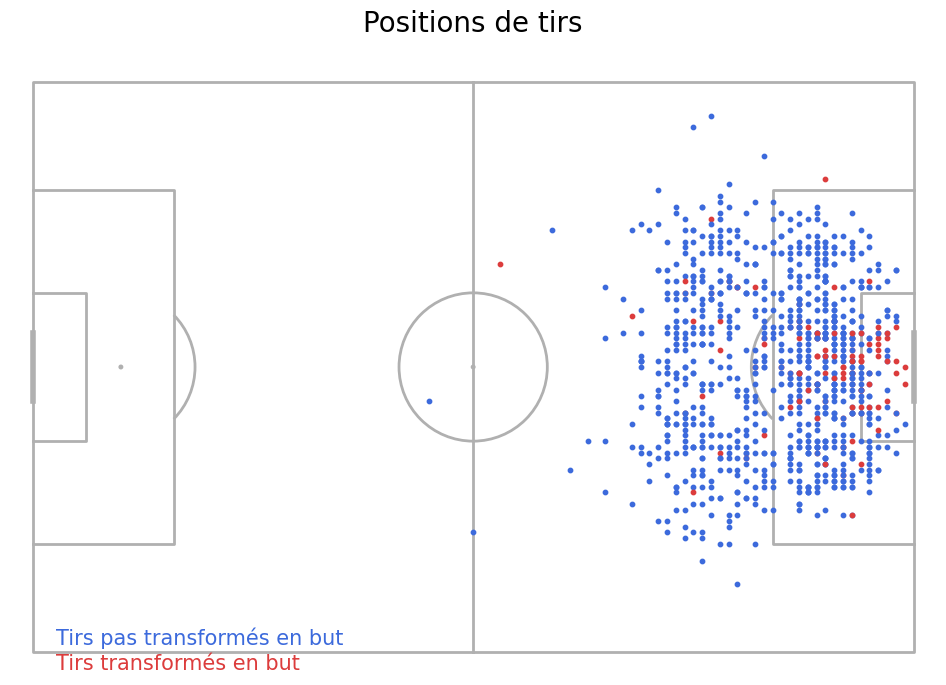

In [8]:
# Affichage des positions des 1000 premiers tirs sur un terrain
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Positions de tirs", size=20, pad=20)

# Important de spécifier le type de terrain (wyscout) pour que le terrain soit bien dessiné 
# et que les positions des tirs soient bien placées
pitch = Pitch(pitch_type='wyscout')
pitch.draw(ax=ax)

for x in range(len(train[:1000])):
    shot = train.iloc[x].tags

    goal = False
    for y in range(len(shot)):
        if shot[y]["id"] == 101:
            goal = True

    if goal:
        # Reduire la taille des points
        pitch.scatter(train.iloc[x].positions[0]["x"], train.iloc[x].positions[0]["y"], ax=ax, s=10, color='#dc3c3c')
        
    else:
        pitch.scatter(train.iloc[x].positions[0]["x"], train.iloc[x].positions[0]["y"], ax=ax, s=10, color='#3c6adc')

# Ajouter une légende pour les codes couleurs des points
ax.text(0.05, 0.05, "Tirs pas transformés en but", color='#3c6adc', transform=ax.transAxes, size=15)
ax.text(0.05, 0.01, "Tirs transformés en but", color='#dc3c3c', transform=ax.transAxes, size=15)

# Affichage du terrain
plt.show()

